# EDA

生データ読み込み

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
from typing import Union, Dict, Any, Optional
from enum import Enum
from math import ceil

%matplotlib inline

df = pd.read_csv('../notebooks/dow.csv')
# df = pd.read_excel('../data/キリンシティ時間帯別売り上げ/23年5月~25年5月時間帯別売上.xlsx')

print(df.head())

   store_code store_name        date time_block  time  sales  customer_count  \
0         132     横浜モアーズ  2023-05-01        ランチ    11  62744              25   
1         132     横浜モアーズ  2023-05-01        ランチ    12  86418              27   
2         132     横浜モアーズ  2023-05-01        ランチ    13  44817              23   
3         132     横浜モアーズ  2023-05-01        ランチ    14  29798              17   
4         132     横浜モアーズ  2023-05-01        ランチ    15  36012              13   

   party_count  sales_target  prev_year_same_weekday_sales  \
0           14         66000                         64333   
1           14         54000                         52323   
2           14        111000                         95962   
3           13         28000                         27513   
4            8         12000                         13039   

   prev_year_same_date_sales  dow  
0                      39805  Mon  
1                      29251  Mon  
2                      67462  Mon  
3 

データの特徴の概観

In [23]:
def show_data_info(df: pd.DataFrame) -> None:
    
    def get_column_types(df):
        """列の種類を分類"""
        numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
        categorical_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]
        missing_cols = df.columns[df.isna().any()].tolist()
        
        return {
            'numeric': numeric_cols,
            'categorical': categorical_cols,
            'missing': missing_cols
        }
    
    col_types = get_column_types(df)
    
    print("=" * 50)
    print("データ基本情報")
    print("=" * 50)
    print(f"データ形状: {df.shape}")
    print(f"数値列 ({len(col_types['numeric'])}): {col_types['numeric']}")
    print(f"カテゴリ列 ({len(col_types['categorical'])}): {col_types['categorical']}")
    print(f"欠損値のある列 ({len(col_types['missing'])}): {col_types['missing']}")
    
    # 欠損値の詳細情報
    if col_types['missing']:
        print(f"\n=== 欠損値詳細 ===")
        missing_info = df[col_types['missing']].isnull().sum()
        for col in col_types['missing']:
            missing_count = missing_info[col]
            missing_rate = (missing_count / len(df)) * 100
            print(f"{col}: {missing_count}/{len(df)} ({missing_rate:.1f}%)")
    
    print("\n=== 各列の詳細 ===")
    print(df.info())
    
    print("\n=== 統計サマリ ===")
    print(df.describe(include='all'))
    
    # 数値列の分布特性
    if col_types['numeric']:
        print(f"\n=== 数値列の分布特性 ===")
        for col in col_types['numeric']:
            col_data = df[col].dropna()
            if len(col_data) > 0:
                skewness = col_data.skew()
                print(f"{col}: 歪度={skewness:.3f} {'(右に歪み)' if skewness > 1 else '(左に歪み)' if skewness < -1 else '(ほぼ正規)'}")
    
    # カテゴリ列のユニーク値数
    if col_types['categorical']:
        print(f"\n=== カテゴリ列のユニーク値数 ===")
        for col in col_types['categorical']:
            unique_count = df[col].nunique()
            total_count = len(df[col].dropna())
            print(f"{col}: {unique_count}個のユニーク値 (非欠損値{total_count}個中)")

# 使用例
show_data_info(df)

データ基本情報
データ形状: (44346, 12)
数値列 (8): ['store_code', 'time', 'sales', 'customer_count', 'party_count', 'sales_target', 'prev_year_same_weekday_sales', 'prev_year_same_date_sales']
カテゴリ列 (4): ['store_name', 'date', 'time_block', 'dow']
欠損値のある列 (0): []

=== 各列の詳細 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44346 entries, 0 to 44345
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   store_code                    44346 non-null  int64 
 1   store_name                    44346 non-null  object
 2   date                          44346 non-null  object
 3   time_block                    44346 non-null  object
 4   time                          44346 non-null  int64 
 5   sales                         44346 non-null  int64 
 6   customer_count                44346 non-null  int64 
 7   party_count                   44346 non-null  int64 
 8   sales_target                  44346 non-nu

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found

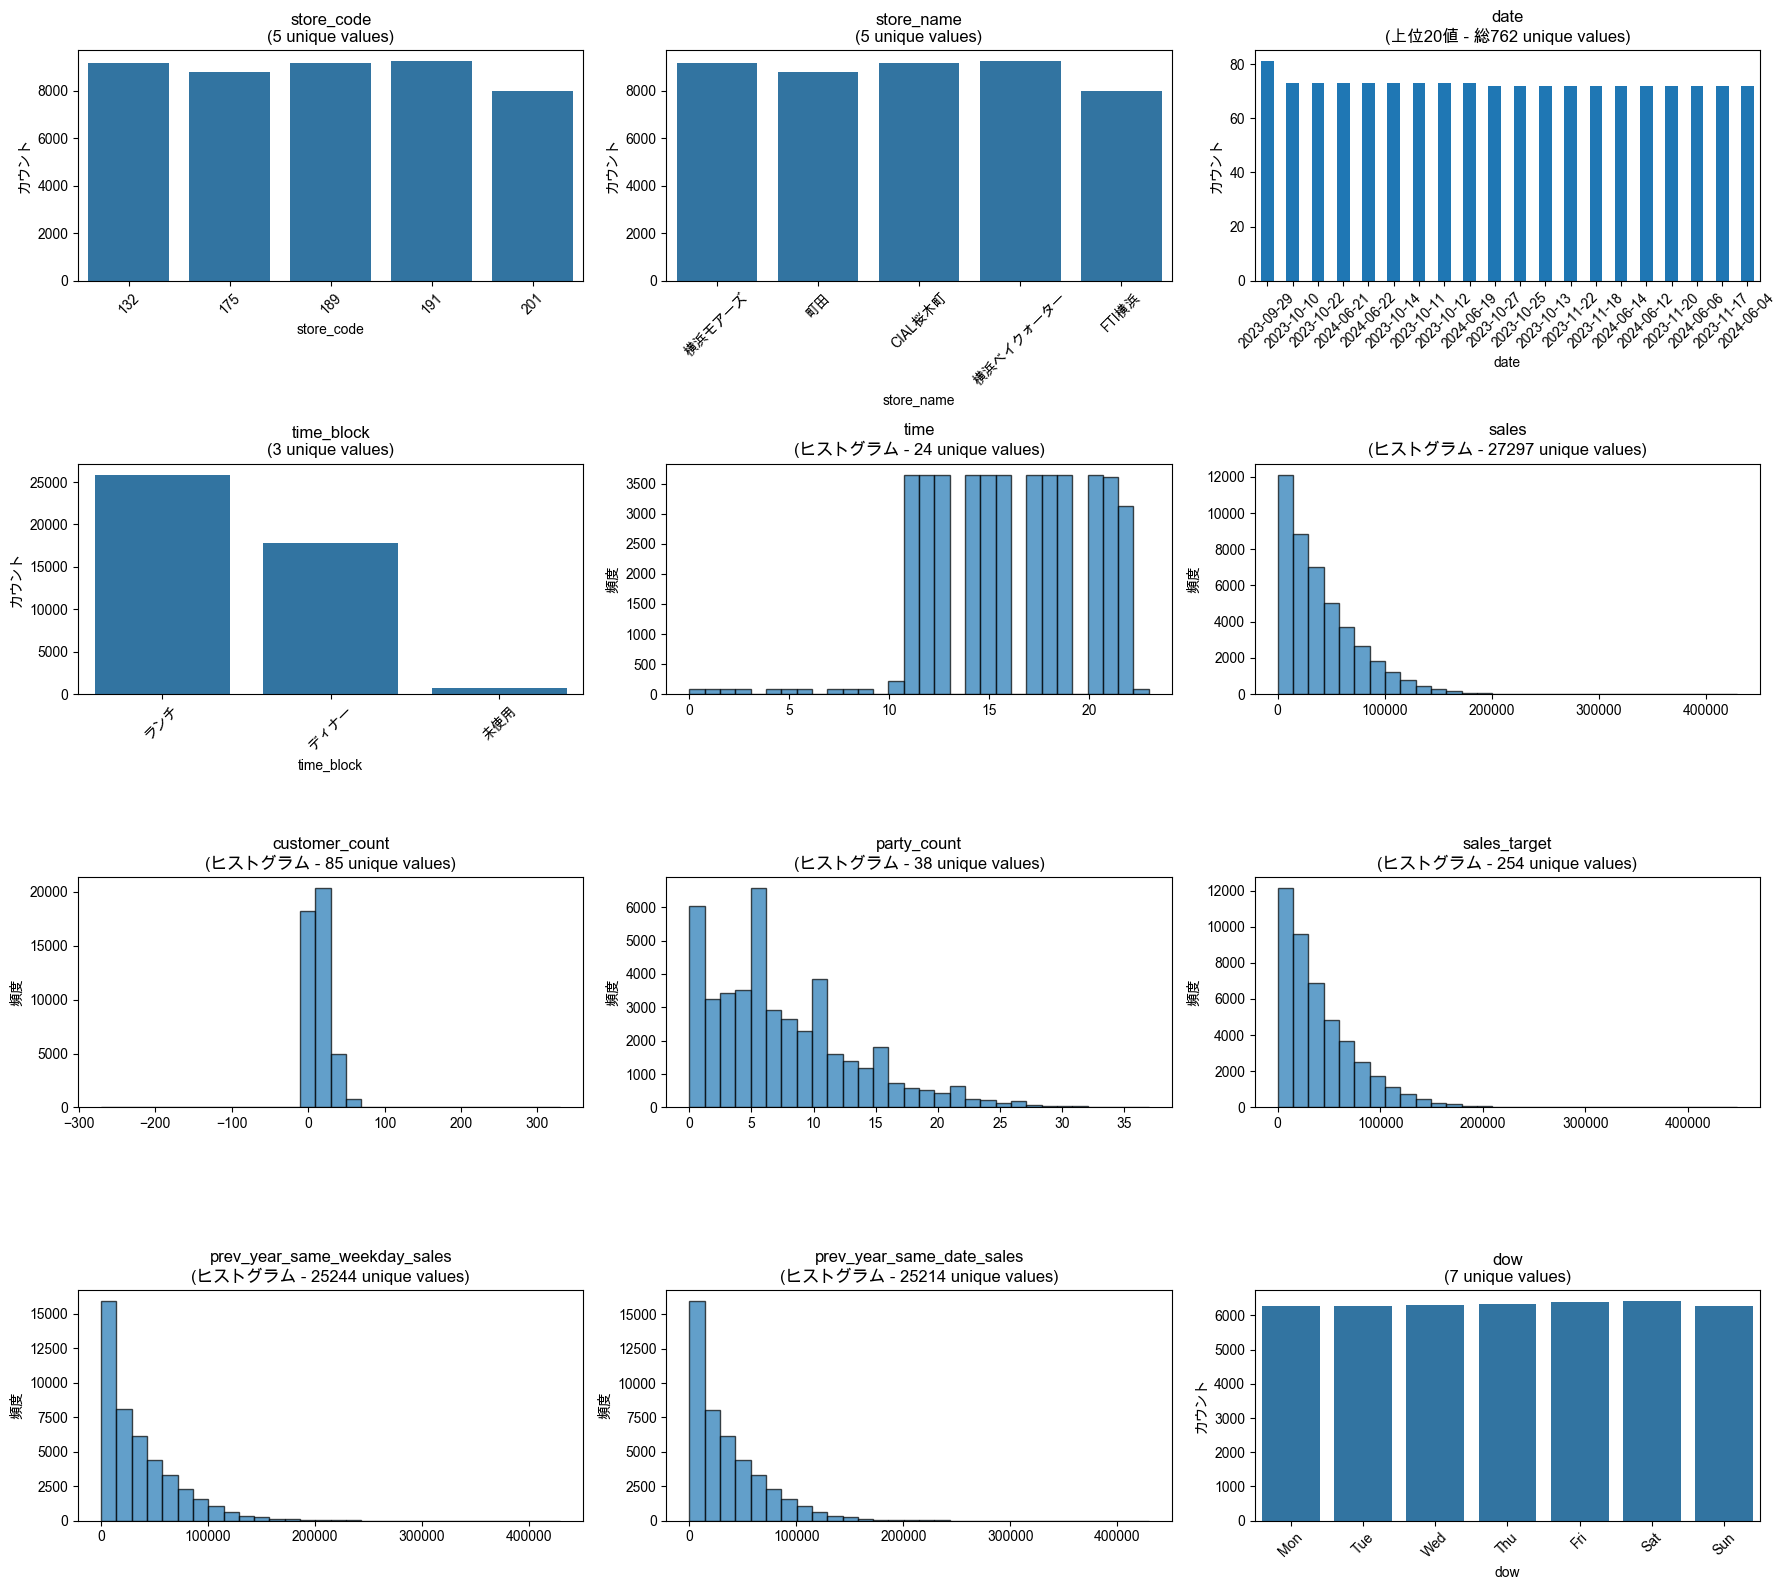

In [44]:
def plot_countplots_all_columns(df, figsize_per_plot=(6, 4), max_unique_values=20, ncols=3):
    """
    データフレームの全ての列についてcountplotを表示する関数
    
    Parameters:
    -----------
    df : pandas.DataFrame
        対象のデータフレーム
    figsize_per_plot : tuple, default=(6, 4)
        各プロットのサイズ
    max_unique_values : int, default=20
        countplotを表示する最大ユニーク値数（これを超える場合はヒストグラム）
    ncols : int, default=3
        サブプロットの列数
    """
    columns = df.columns.tolist()
    n_cols = len(columns)
    
    if n_cols == 0:
        print("データフレームに列がありません。")
        return
    
    # サブプロットの行数を計算
    nrows = ceil(n_cols / ncols)
    
    # 全体のfigureサイズを計算
    total_figsize = (figsize_per_plot[0] * ncols, figsize_per_plot[1] * nrows)
    
    # サブプロットを作成
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=total_figsize)
    
    # axesを1次元配列に変換（修正版）
    if nrows == 1 and ncols == 1:
        axes = [axes]
    elif nrows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for i, column in enumerate(columns):
        ax = axes[i]
        
        # 欠損値を除いたユニーク値数をチェック
        unique_count = df[column].nunique()
        
        try:
            if unique_count > max_unique_values:
                # ユニーク値が多すぎる場合はヒストグラムを表示
                # 数値データかどうかチェック
                if df[column].dtype in ['int64', 'float64', 'int32', 'float32']:
                    ax.hist(df[column].dropna(), bins=30, alpha=0.7, edgecolor='black')
                    ax.set_title(f'{column}\n(ヒストグラム - {unique_count} unique values)')
                    ax.set_ylabel('頻度')
                else:
                    # 非数値データの場合、上位値のみ表示
                    top_values = df[column].value_counts().head(max_unique_values)
                    top_values.plot(kind='bar', ax=ax)
                    ax.set_title(f'{column}\n(上位{len(top_values)}値 - 総{unique_count} unique values)')
                    ax.set_ylabel('カウント')
                    ax.tick_params(axis='x', rotation=45)
            else:
                # countplotを表示
                sns.countplot(data=df, x=column, ax=ax)
                ax.set_title(f'{column}\n({unique_count} unique values)')
                ax.set_ylabel('カウント')
                
                # x軸のラベルを回転（読みやすくするため）
                ax.tick_params(axis='x', rotation=45)
                
        except Exception as e:
            # エラーが発生した場合の処理
            ax.text(0.5, 0.5, f'エラー:\n{str(e)}', 
                   horizontalalignment='center', 
                   verticalalignment='center', 
                   transform=ax.transAxes)
            ax.set_title(f'{column} (エラー)')
    
    # 余ったサブプロットを非表示にする
    for j in range(n_cols, len(axes)):
        axes[j].set_visible(False)
    
    # レイアウトを調整
    plt.tight_layout()
    plt.show()

plot_countplots_all_columns(df)

基本統計量算出プログラム
1. 検索ワードを入力
2. 検索列を入力
3. 検索ワードの大文字/小文字を区別するかを選択
4. 分析列を入力
5. 検索列に検索ワードを含む行のみをフィルタリングしたデータの分析列について、種々の統計量を算出

In [29]:
import pandas as pd
from typing import Dict, Any

def analyze_column(df: pd.DataFrame, column_name: str, top_n: int = 10) -> Dict[str, Any]:
    """
    指定された列を分析し、数値データなら基本統計量、カテゴリカルデータなら頻度ランキングを返す
    """
    if column_name not in df.columns:
        return {"error": f"列 '{column_name}' が見つかりません"}

    column = df[column_name]
    result = {
        "column_name": column_name,
        "total_count": len(column),
        "missing_count": column.isnull().sum(),
        "missing_rate": column.isnull().sum() / len(column) * 100
    }

    valid_data = column.dropna()
    if len(valid_data) == 0:
        result["analysis_type"] = "empty"
        result["message"] = "有効なデータがありません（全て欠損値）"
        return result

    if pd.api.types.is_numeric_dtype(valid_data):
        result["analysis_type"] = "numeric"
        result["statistics"] = _get_numeric_stats(valid_data)
    else:
        result["analysis_type"] = "categorical"
        result["frequency_ranking"] = _get_frequency_ranking(valid_data, top_n)

    return result


def _get_numeric_stats(data: pd.Series) -> Dict[str, float]:
    return {
        "count": len(data),
        "mean": data.mean(),
        "median": data.median(),
        "std": data.std(),
        "var": data.var(),
        "min": data.min(),
        "max": data.max(),
        "range": data.max() - data.min(),
        "q1": data.quantile(0.25),
        "q3": data.quantile(0.75),
        "iqr": data.quantile(0.75) - data.quantile(0.25),
        "skewness": data.skew(),
        "kurtosis": data.kurtosis()
    }


def _get_frequency_ranking(data: pd.Series, top_n: int) -> Dict[str, Any]:
    value_counts = data.value_counts()
    total_count = len(data)
    unique_count = len(value_counts)
    top_values = []
    for i, (value, count) in enumerate(value_counts.head(top_n).items(), 1):
        top_values.append({
            "rank": i,
            "value": value,
            "count": count,
            "percentage": (count / total_count) * 100
        })

    return {
        "unique_count": unique_count,
        "most_frequent": value_counts.index[0] if not value_counts.empty else None,
        "most_frequent_count": value_counts.iloc[0] if not value_counts.empty else 0,
        "top_values": top_values,
        "other_count": max(0, unique_count - top_n)
    }


def print_analysis_result(result: Dict[str, Any]) -> None:
    if "error" in result:
        print(f"❌ エラー: {result['error']}")
        return

    print(f"📊 列分析結果: {result['column_name']}")
    print("=" * 50)
    print(f"総データ数: {result['total_count']}")
    print(f"欠損値数: {result['missing_count']} ({result['missing_rate']:.2f}%)")

    if result["analysis_type"] == "empty":
        print(f"⚠️  {result['message']}")
        return

    if result["analysis_type"] == "numeric":
        stats = result["statistics"]
        print("📈 数値データ - 基本統計量")
        print("-" * 30)
        print(f"有効データ数: {stats['count']}")
        print(f"平均値: {stats['mean']:.4f}")
        print(f"中央値: {stats['median']:.4f}")
        print(f"標準偏差: {stats['std']:.4f}")
        print(f"分散: {stats['var']:.4f}")
        print(f"最小値: {stats['min']:.4f}")
        print(f"第1四分位: {stats['q1']:.4f}")
        print(f"第3四分位: {stats['q3']:.4f}")
        print(f"最大値: {stats['max']:.4f}")
        print(f"範囲: {stats['range']:.4f}")
        print(f"四分位範囲(IQR): {stats['iqr']:.4f}")
        print(f"歪度: {stats['skewness']:.4f}")
        print(f"尖度: {stats['kurtosis']:.4f}")
    else:
        freq = result["frequency_ranking"]
        print("📋 カテゴリカルデータ - 頻度ランキング")
        print("-" * 35)
        print(f"ユニーク値数: {freq['unique_count']}")
        print(f"最頻値: {freq['most_frequent']} ({freq['most_frequent_count']}回)")
        print("上位ランキング:")
        for item in freq["top_values"]:
            print(f"{item['rank']:2d}. {item['value']} - {item['count']}回 ({item['percentage']:.2f}%)")
        if freq["other_count"] > 0:
            print(f"... その他 {freq['other_count']} 個の値")


def filter_data_by_search(df: pd.DataFrame, search_column: str, search_word: str, case_sensitive: bool = False) -> pd.DataFrame:
    if search_column not in df.columns:
        print(f"❌ エラー: 列 '{search_column}' が見つかりません")
        return df

    original_count = len(df)
    search_series = df[search_column].astype(str)
    if not case_sensitive:
        search_series = search_series.str.lower()
        search_word = search_word.lower()

    filtered_df = df[search_series.str.contains(search_word, na=False)]
    filtered_count = len(filtered_df)

    print(f"🔍 検索結果: {filtered_count}/{original_count} 行が残りました ({filtered_count/original_count*100:.2f}% 残存)")
    return filtered_df


def run_search_eda_analysis(df: pd.DataFrame):
    print("🔍 検索機能付きEDA分析ツール")
    print("=" * 60)

    print(f"初期データ: 行数={len(df)}, 列数={len(df.columns)}")
    print(f"利用可能な列: {list(df.columns)}")

    # 1. フィルタリング
    print("\n1️⃣ データを検索でフィルタリング")
    search_column = input("検索する列名を入力してください: ").strip()
    search_word = input("検索ワードを入力してください: ").strip()
    case_input = input("大文字小文字を区別しますか？ (y/n): ").strip().lower()
    df_filtered = filter_data_by_search(df, search_column, search_word, case_input == 'y')

    # 2. 分析実行
    print("\n2️⃣ 列分析を実行")
    analysis_column = input("分析する列名を入力してください: ").strip()
    top_n_input = input("カテゴリカルデータの表示件数 (デフォルト10): ").strip()
    top_n = int(top_n_input) if top_n_input.isdigit() else 10
    result = analyze_column(df_filtered, analysis_column, top_n)
    print_analysis_result(result)


run_search_eda_analysis(df)


🔍 検索機能付きEDA分析ツール
初期データ: 行数=44346, 列数=12
利用可能な列: ['store_code', 'store_name', 'date', 'time_block', 'time', 'sales', 'customer_count', 'party_count', 'sales_target', 'prev_year_same_weekday_sales', 'prev_year_same_date_sales', 'dow']

1️⃣ データを検索でフィルタリング
🔍 検索結果: 9175/44346 行が残りました (20.69% 残存)

2️⃣ 列分析を実行
📊 列分析結果: sales
総データ数: 9175
欠損値数: 0 (0.00%)
📈 数値データ - 基本統計量
------------------------------
有効データ数: 9175
平均値: 39154.5784
中央値: 33456.0000
標準偏差: 29463.5119
分散: 868098534.2151
最小値: 0.0000
第1四分位: 16197.5000
第3四分位: 56537.5000
最大値: 181557.0000
範囲: 181557.0000
四分位範囲(IQR): 40340.0000
歪度: 0.9493
尖度: 0.7898


散布図描画
1. x軸_列名を入力、y軸_列名を入力、続いて散布図を作成しますか(y/n)を選択
2. nが選択されるまで1.を繰り返す
3. nが選択されたら、その時点までで選択された軸の組み合わせを持つ散布図を全て書く


利用可能な列:
store_code, store_name, date, time_block, time, sales, customer_count, party_count, sales_target, prev_year_same_weekday_sales, prev_year_same_date_sales, dow

--- 散布図 1 ---

--- 散布図 2 ---

--- 散布図 3 ---
エラー: 列 'dow_sales' が存在しません

--- 散布図 3 ---
エラー: 列 '' が存在しません

--- 散布図 3 ---
エラー: 列 '' が存在しません

--- 散布図 3 ---


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found


散布図を生成中...


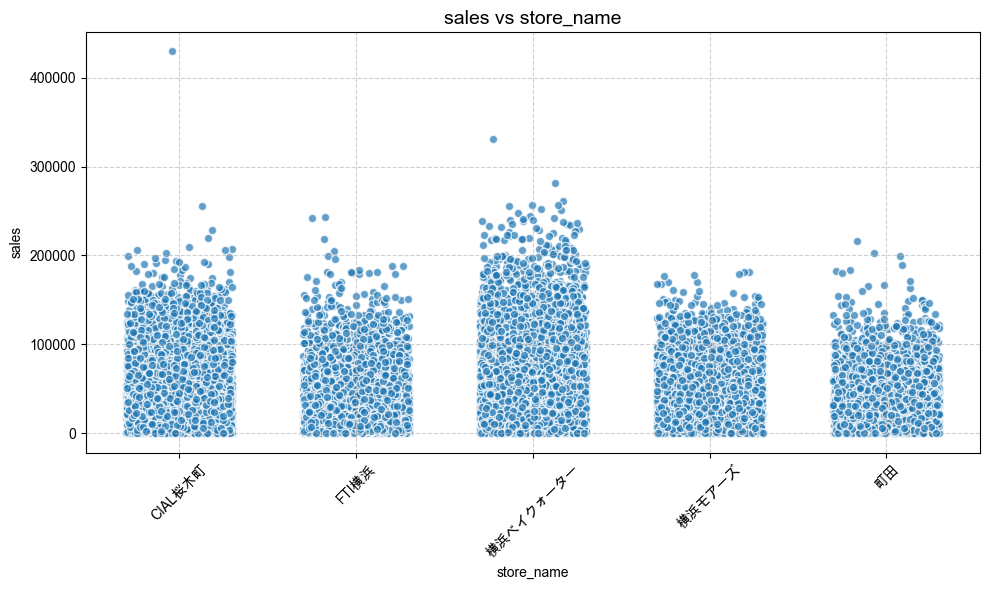

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found

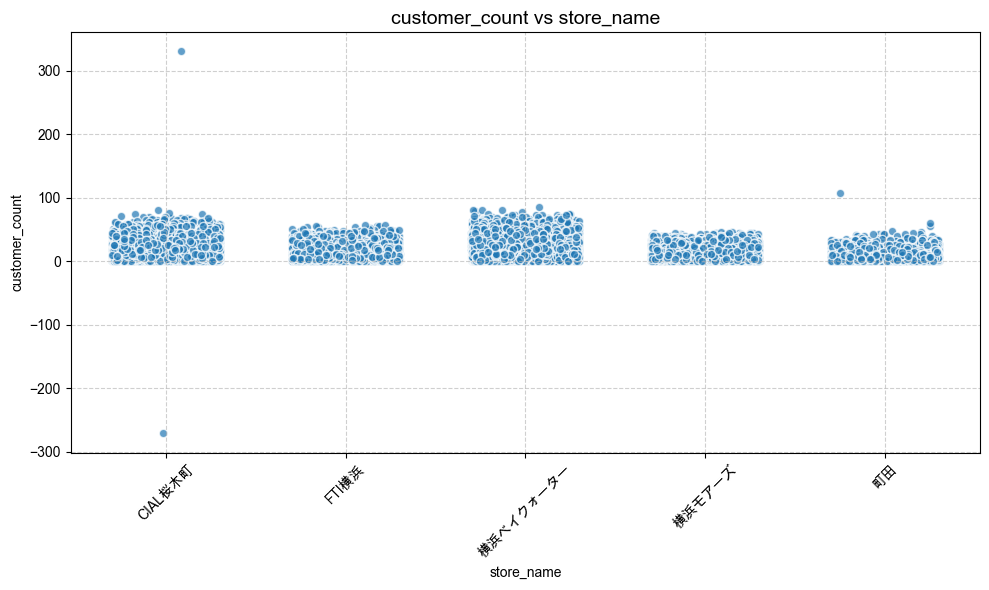

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found

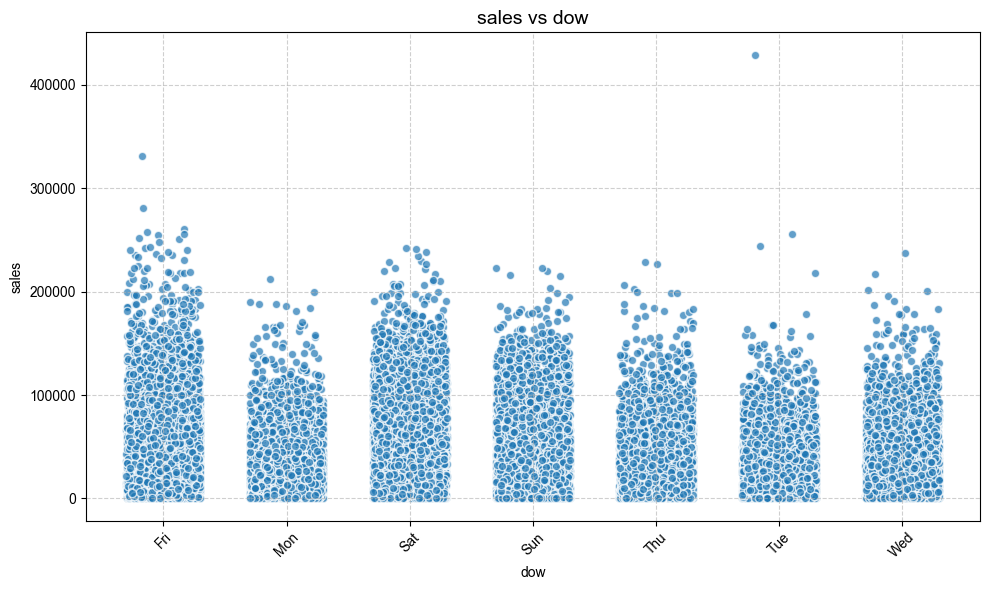


3個の散布図を表示しました


In [36]:
class ColumnType(Enum):
    NUMERIC = 1
    CATEGORICAL = 2

def detect_column_type(series):
    """列のデータ型を判定"""
    if pd.api.types.is_numeric_dtype(series):
        return ColumnType.NUMERIC
    return ColumnType.CATEGORICAL

def prepare_axis_data(series):
    """散布図用に軸データを準備"""
    col_type = detect_column_type(series)
    
    if col_type == ColumnType.CATEGORICAL:
        # カテゴリカル変数を数値に変換
        categories = series.astype('category').cat.categories
        codes = series.astype('category').cat.codes
        
        # カテゴリが2つ以上の場合にjitterを追加
        if len(categories) > 1:
            jitter = np.random.uniform(-0.3, 0.3, size=len(codes))
            return codes + jitter, categories, True
        return codes, categories, True
    
    return series, None, False

def plot_scatter(ax, x, y, xlabel, ylabel):
    """散布図をプロット"""
    ax.scatter(x, y, alpha=0.7, edgecolor='w')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_title(f'{ylabel} vs {xlabel}', fontsize=14)

def create_scatter_plots(df):
    """データフレームを受け取り、対話的に散布図を作成してノートブックに表示"""
    print("\n利用可能な列:")
    print(', '.join(df.columns))
    
    plots = []
    plot_count = 1

    while True:
        print(f"\n--- 散布図 {plot_count} ---")
        x_col = input(f"x軸{plot_count}_列名を入力: ").strip()
        y_col = input(f"y軸{plot_count}_列名を入力: ").strip()
        
        # 列の存在チェック
        if x_col not in df.columns:
            print(f"エラー: 列 '{x_col}' が存在しません")
            continue
        if y_col not in df.columns:
            print(f"エラー: 列 '{y_col}' が存在しません")
            continue
        
        plots.append((x_col, y_col))
        plot_count += 1
        
        # 継続確認
        while True:
            choice = input("続けて散布図を追加しますか？ (y/n): ").strip().lower()
            if choice in ['y', 'n']:
                break
            print("無効な入力: y または n を入力してください")
        
        if choice == 'n':
            break
    
    # 散布図の描画
    print("\n散布図を生成中...")
    
    # 日本語フォント設定（環境に合わせてコメントを解除）
    # plt.rcParams['font.family'] = 'DejaVu Sans'  # Linux
    # plt.rcParams['font.family'] = 'MS Gothic'    # Windows
    # plt.rcParams['font.family'] = 'Hiragino Sans' # Mac
    
    # 各散布図をノートブックに表示
    for i, (x_col, y_col) in enumerate(plots, 1):
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # 軸データの準備
        x_data, x_labels, is_cat_x = prepare_axis_data(df[x_col])
        y_data, y_labels, is_cat_y = prepare_axis_data(df[y_col])
        
        # 散布図のプロット
        plot_scatter(ax, x_data, y_data, x_col, y_col)
        
        # カテゴリカル軸のラベル設定
        if is_cat_x and x_labels is not None:
            ax.set_xticks(range(len(x_labels)))
            ax.set_xticklabels(x_labels, rotation=45)
        
        if is_cat_y and y_labels is not None:
            ax.set_yticks(range(len(y_labels)))
            ax.set_yticklabels(y_labels)
        
        plt.tight_layout()
        plt.show()  # ノートブックに直接表示
    
    print(f"\n{len(plots)}個の散布図を表示しました")

create_scatter_plots(df)

データフレームから指定した2変数で3次元ヒストグラムを作成する関数

利用可能な変数: ['店舗コード', '店舗名', '日付', '時間区分', '時間', '売上', '客数', '組数', '売上計画', '前年実績(前年同曜)', '前年実績(前年同日)', '曜日']


グラフの種類を選択してください:
1. 3Dバーヒストグラム
2. 3Dサーフェスヒストグラム

X軸変数: ['時間']
Y軸変数: ['売上']
Z軸: 頻度
ビン数: 24
総組み合わせ数: 1 × 1 = 1


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found


進行状況: 1/1
作成中: 時間 × 売上


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Yu Gothic' not found

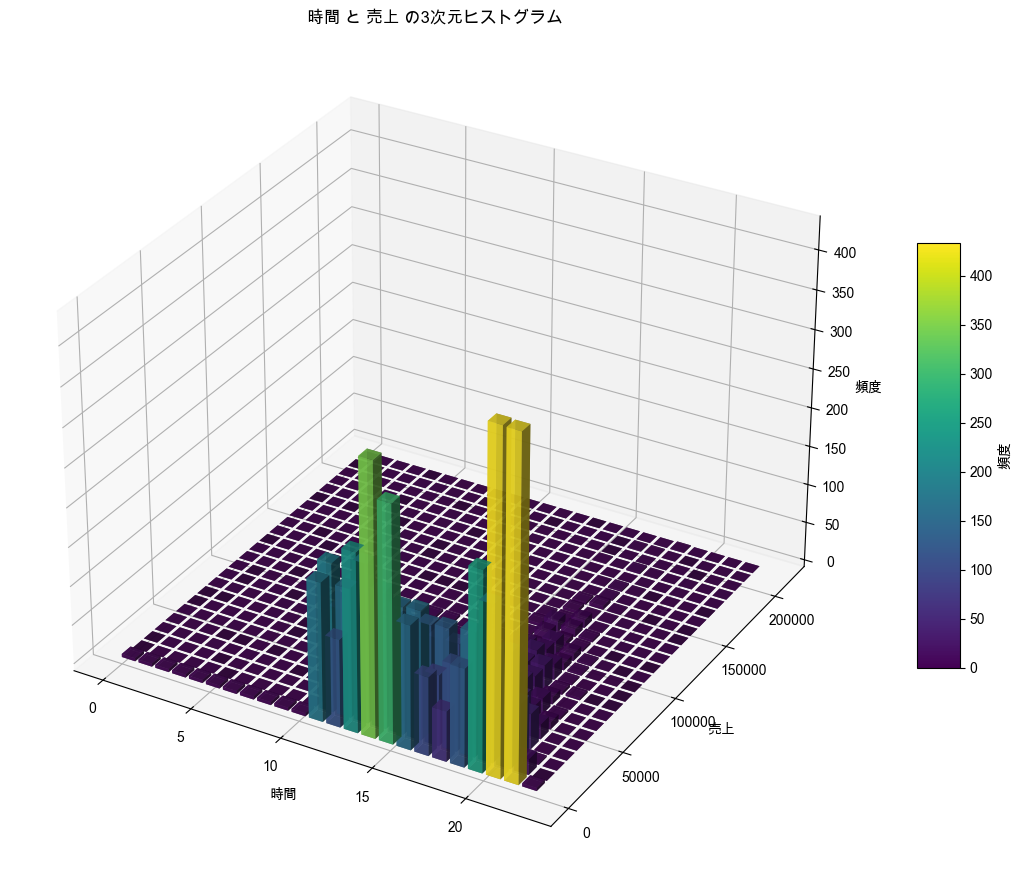


頻度最大の上位3つの点の情報

【時間 × 売上】
----------------------------------------
第1位:
  時間: 20.604 (範囲: 20.125 - 21.083)
  売上: 4514.417 (範囲: 0.000 - 9028.833)
  頻度: 433

第2位:
  時間: 21.562 (範囲: 21.083 - 22.042)
  売上: 4514.417 (範囲: 0.000 - 9028.833)
  頻度: 432

第3位:
  時間: 13.896 (範囲: 13.417 - 14.375)
  売上: 4514.417 (範囲: 0.000 - 9028.833)
  頻度: 347


完了: 1個の組み合わせでグラフを作成しました。


In [20]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def create_3d_histogram(df, x_variable, y_variable, bins=20):
    """
    データフレームから指定した2変数で3次元バーヒストグラムを作成する関数
    """
    
    # 変数の存在確認
    if x_variable not in df.columns:
        print(f"エラー: '{x_variable}' は存在しない列です。")
        return None
    
    if y_variable not in df.columns:
        print(f"エラー: '{y_variable}' は存在しない列です。")
        return None
    
    # 欠損値を除去
    data_clean = df[[x_variable, y_variable]].dropna()
    
    if len(data_clean) == 0:
        print("データがありません。")
        return None
    
    # データを取得
    x_data = data_clean[x_variable]
    y_data = data_clean[y_variable]
    
    # 2次元ヒストグラムを作成（頻度を計算）
    hist, xedges, yedges = np.histogram2d(x_data, y_data, bins=bins)
    
    # グリッドを作成
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    
    # バーの寸法を設定
    dx = (xedges[1] - xedges[0]) * 0.8
    dy = (yedges[1] - yedges[0]) * 0.8
    dz = hist.ravel()
    
    # 3Dプロットを作成
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # 色を頻度に基づいて設定
    colors = plt.cm.viridis(dz / dz.max() if dz.max() > 0 else dz)
    
    # 3Dバープロットを作成
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, alpha=0.8)
    
    # ラベルとタイトルを設定
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)
    ax.set_zlabel('頻度')
    ax.set_title(f'{x_variable} と {y_variable} の3次元ヒストグラム')
    
    # カラーバーを追加
    if dz.max() > 0:
        mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
        mappable.set_array(dz)
        plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, label='頻度')
    
    plt.tight_layout()
    plt.show()
    
    # 頻度最大の上位3つの点を取得
    return get_top_frequency_points(hist, xedges, yedges, x_variable, y_variable)

def create_3d_surface_histogram(df, x_variable, y_variable, bins=20):
    """
    データフレームから指定した2変数で3次元サーフェスヒストグラムを作成する関数
    """
    
    # 変数の存在確認
    if x_variable not in df.columns:
        print(f"エラー: '{x_variable}' は存在しない列です。")
        return None
    
    if y_variable not in df.columns:
        print(f"エラー: '{y_variable}' は存在しない列です。")
        return None
    
    # 欠損値を除去
    data_clean = df[[x_variable, y_variable]].dropna()
    
    if len(data_clean) == 0:
        print("データがありません。")
        return None
    
    # データを取得
    x_data = data_clean[x_variable]
    y_data = data_clean[y_variable]
    
    # 2次元ヒストグラムを作成
    hist, xedges, yedges = np.histogram2d(x_data, y_data, bins=bins)
    
    # グリッドを作成
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
    
    # 3Dサーフェスプロットを作成
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # サーフェスプロット
    surf = ax.plot_surface(X, Y, hist.T, cmap='viridis', alpha=0.8)
    
    # ラベルとタイトルを設定
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)
    ax.set_zlabel('頻度')
    ax.set_title(f'{x_variable} と {y_variable} の3次元サーフェスヒストグラム')
    
    # カラーバーを追加
    plt.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='頻度')
    
    plt.tight_layout()
    plt.show()
    
    # 頻度最大の上位3つの点を取得
    return get_top_frequency_points(hist, xedges, yedges, x_variable, y_variable)

def get_top_frequency_points(hist, xedges, yedges, x_variable, y_variable, top_n=3):
    """
    頻度最大の上位n個の点の情報を取得する関数
    """
    # 頻度が0でない点のみを取得
    nonzero_indices = np.nonzero(hist)
    if len(nonzero_indices[0]) == 0:
        return []
    
    # 頻度とその位置を取得
    frequencies = hist[nonzero_indices]
    x_indices = nonzero_indices[0]
    y_indices = nonzero_indices[1]
    
    # 頻度で降順ソート
    sorted_indices = np.argsort(frequencies)[::-1]
    
    # 上位n個を取得
    top_points = []
    for i in range(min(top_n, len(sorted_indices))):
        idx = sorted_indices[i]
        x_idx = x_indices[idx]
        y_idx = y_indices[idx]
        frequency = frequencies[idx]
        
        # ビンの中央値を計算
        x_center = (xedges[x_idx] + xedges[x_idx + 1]) / 2
        y_center = (yedges[y_idx] + yedges[y_idx + 1]) / 2
        
        top_points.append({
            'rank': i + 1,
            'x_variable': x_variable,
            'y_variable': y_variable,
            'x_value': x_center,
            'y_value': y_center,
            'frequency': frequency,
            'x_range': (xedges[x_idx], xedges[x_idx + 1]),
            'y_range': (yedges[y_idx], yedges[y_idx + 1])
        })
    
    return top_points

def print_top_points(top_points_list):
    """
    頻度最大の上位点の情報を出力する関数
    """
    if not top_points_list:
        print("頻度データがありません。")
        return
    
    print("\n" + "="*80)
    print("頻度最大の上位3つの点の情報")
    print("="*80)
    
    for points in top_points_list:
        if points:  # 空でない場合のみ処理
            x_var = points[0]['x_variable']
            y_var = points[0]['y_variable']
            print(f"\n【{x_var} × {y_var}】")
            print("-" * 40)
            
            for point in points:
                print(f"第{point['rank']}位:")
                print(f"  {x_var}: {point['x_value']:.3f} (範囲: {point['x_range'][0]:.3f} - {point['x_range'][1]:.3f})")
                print(f"  {y_var}: {point['y_value']:.3f} (範囲: {point['y_range'][0]:.3f} - {point['y_range'][1]:.3f})")
                print(f"  頻度: {point['frequency']:.0f}")
                print()

def parse_variable_list(input_string):
    """
    カンマ区切りの文字列をリストに変換する関数
    """
    if not input_string.strip():
        return []
    
    # カンマ区切りで分割し、前後の空白を除去
    variables = [var.strip() for var in input_string.split(',')]
    # 空文字列を除去
    variables = [var for var in variables if var]
    
    return variables

def main():
    
    print("利用可能な変数:", list(dff.columns))
    print()
    
    # X軸の変数を入力（複数可）
    x_input = input("X軸（変数1）に使用する変数を入力してください（複数の場合はカンマ区切り）: ").strip()
    x_variables = parse_variable_list(x_input)
    
    if not x_variables:
        print("X軸の変数が指定されていません。")
        return
    
    # Y軸の変数を入力（複数可）
    y_input = input("Y軸（変数2）に使用する変数を入力してください（複数の場合はカンマ区切り）: ").strip()
    y_variables = parse_variable_list(y_input)
    
    if not y_variables:
        print("Y軸の変数が指定されていません。")
        return
    
    # 無効な変数をチェック
    all_variables = x_variables + y_variables
    invalid_variables = [var for var in all_variables if var not in dff.columns]
    
    if invalid_variables:
        print(f"エラー: 以下の変数は存在しません: {invalid_variables}")
        return
    
    # ビンの数を入力
    bins_input = input("ビンの数を入力してください（デフォルト：20）: ").strip()
    bins = int(bins_input) if bins_input.isdigit() else 20
    
    # グラフの種類を選択
    print("\nグラフの種類を選択してください:")
    print("1. 3Dバーヒストグラム")
    print("2. 3Dサーフェスヒストグラム")
    graph_type = input("選択（1または2）: ").strip()
    
    print(f"\nX軸変数: {x_variables}")
    print(f"Y軸変数: {y_variables}")
    print(f"Z軸: 頻度")
    print(f"ビン数: {bins}")
    print(f"総組み合わせ数: {len(x_variables)} × {len(y_variables)} = {len(x_variables) * len(y_variables)}")
    
    # 確認
    proceed = input("\n実行しますか？ (y/n): ").strip().lower()
    if proceed not in ['y', 'yes']:
        print("実行を中止しました。")
        return
    
    # すべての組み合わせで3次元ヒストグラムを作成
    all_top_points = []
    
    for i, x_var in enumerate(x_variables):
        for j, y_var in enumerate(y_variables):
            if x_var == y_var:
                print(f"\nスキップ: {x_var} と {y_var} は同じ変数です。")
                continue
            
            print(f"\n進行状況: {i * len(y_variables) + j + 1}/{len(x_variables) * len(y_variables)}")
            print(f"作成中: {x_var} × {y_var}")
            
            # 3次元ヒストグラムを作成
            if graph_type == "2":
                top_points = create_3d_surface_histogram(dff, x_var, y_var, bins)
            else:
                top_points = create_3d_histogram(dff, x_var, y_var, bins)
            
            if top_points:
                all_top_points.append(top_points)
    
    # 頻度最大の上位3つの点の情報を出力
    print_top_points(all_top_points)
    
    print(f"\n完了: {len(all_top_points)}個の組み合わせでグラフを作成しました。")

# 直接実行時のみmain関数を呼び出し
if __name__ == "__main__":
    main()

# 使用例:
# X軸: age, income
# Y軸: height, weight, score
# ビン数: 15
# この場合、以下の組み合わせでグラフが作成されます：
# age×height, age×weight, age×score, income×height, income×weight, income×score

In [39]:
def analyze_sales_data(df: pd.DataFrame) -> Dict[str, Any]:
    """
    曜日ごとの売上データを分析する関数
    
    Args:
        df (DataFrame): 売上データを含むデータフレーム
        
    Returns:
        dict: 分析結果を含む辞書
    """
    # データの前処理
    df = preprocess_data(df)
    
    # 基本統計量の計算
    total_sales = df['sales'].sum()
    total_customers = df['customer_count'].sum()
    overall_avg_price = round(total_sales / total_customers) if total_customers > 0 else 0
    
    # 曜日別集計
    weekday_group = df.groupby('dow')
    weekday_sales = weekday_group['sales'].sum()
    weekday_customers = weekday_group['customer_count'].sum()
    weekday_avg_price = (weekday_sales / weekday_customers).round().astype(int)
    
    # 時間帯別集計
    hour_group = df.groupby('time')
    hour_sales = hour_group['sales'].sum()
    hour_customers = hour_group['customer_count'].sum()
    hour_avg_price = (hour_sales / hour_customers).round().astype(int)
    
    # 結果を辞書にまとめる
    return {
        'total_sales': total_sales,
        'total_customers': total_customers,
        'overall_avg_price': overall_avg_price,
        'weekday_sales': weekday_sales.sort_values(ascending=False).to_dict(),
        'weekday_customers': weekday_customers.to_dict(),
        'weekday_avg_price': weekday_avg_price.to_dict(),
        'hour_sales': hour_sales.sort_values(ascending=False).to_dict(),
        'hour_customers': hour_customers.to_dict(),
        'hour_avg_price': hour_avg_price.to_dict()
    }

def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    データの前処理を行う関数
    
    Args:
        df (DataFrame): 入力データフレーム
        
    Returns:
        DataFrame: 前処理済みのデータフレーム
    """
    # 必要な列のみを選択
    df = df[['time', 'sales', 'customer_count', 'dow']].copy()
    
    # 数値変換
    df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
    df['customer_count'] = pd.to_numeric(df['customer_count'], errors='coerce')
    
    # 不正なデータのフィルタリング
    df = df.dropna(subset=['sales', 'customer_count'])
    df = df[(df['sales'] > 0) & (df['customer_count'] > 0)]
    
    # 曜日の順序指定
    weekday_order = ['月', '火', '水', '木', '金', '土', '日']
    df['dow'] = pd.Categorical(df['dow'], categories=weekday_order, ordered=True)
    
    return df

def format_currency(value: float) -> str:
    """数値を通貨形式の文字列に変換"""
    return f"{value:,.0f}円"

def show(results: Dict[str, Any]):
    """
    分析結果を可視化して表示する関数
    
    Args:
        results (dict): analyze_sales_dataの出力結果
    """
    # 全体サマリー
    print("=" * 80)
    print("売上データ分析結果")
    print("=" * 80)
    print(f"総売上: {format_currency(results['total_sales'])}")
    print(f"総客数: {results['total_customers']:,}人")
    print(f"全体平均客単価: {format_currency(results['overall_avg_price'])}")
    
    # 曜日別サマリー
    print("\n" + "=" * 80)
    print("曜日別分析")
    print("=" * 80)
    
    # 曜日別データフレーム作成
    weekday_data = []
    for dow in results['weekday_sales']:
        weekday_data.append({
            '曜日': dow,
            '売上': results['weekday_sales'][dow],
            '客数': results['weekday_customers'][dow],
            '客単価': results['weekday_avg_price'][dow]
        })
    
    weekday_df = pd.DataFrame(weekday_data)
    weekday_df = weekday_df.sort_values('売上', ascending=False)
    
    # 表形式で表示
    display_df = weekday_df.copy()
    display_df['売上'] = display_df['売上'].apply(format_currency)
    display_df['客単価'] = display_df['客単価'].apply(format_currency)
    display_df['客数'] = display_df['客数'].apply(lambda x: f"{x:,}人")
    
    print(display_df.to_string(index=False))
    
    # 時間帯別売上ランキング（上位10）
    print("\n" + "=" * 80)
    print("時間帯別売上ランキング (上位10)")
    print("=" * 80)
    
    hour_data = []
    for i, (time, sales) in enumerate(results['hour_sales'].items()):
        if i >= 10:
            break
        hour_data.append({
            '順位': i+1,
            '時間帯': time,
            '売上': sales,
            '客数': results['hour_customers'][time],
            '客単価': results['hour_avg_price'][time]
        })
    
    hour_df = pd.DataFrame(hour_data)
    
    # 表形式で表示
    display_hour_df = hour_df.copy()
    display_hour_df['売上'] = display_hour_df['売上'].apply(format_currency)
    display_hour_df['客単価'] = display_hour_df['客単価'].apply(format_currency)
    display_hour_df['客数'] = display_hour_df['客数'].apply(lambda x: f"{x:,}人")
    
    print(display_hour_df.to_string(index=False))
    
    # 可視化
    visualize_results(results)

def visualize_results(results: Dict[str, Any]):
    """
    分析結果を可視化する関数
    
    Args:
        results (dict): 分析結果
    """
    plt.figure(figsize=(15, 10))
    
    # 曜日別売上
    plt.subplot(2, 2, 1)
    weekday_df = pd.DataFrame({
        '曜日': list(results['weekday_sales'].keys()),
        '売上': list(results['weekday_sales'].values())
    })
    sns.barplot(x='曜日', y='売上', data=weekday_df, order=['月','火','水','木','金','土','日'])
    plt.title('曜日別売上')
    plt.xlabel('曜日')
    plt.ylabel('売上 (円)')
    
    # 曜日別客数
    plt.subplot(2, 2, 2)
    weekday_df['客数'] = [results['weekday_customers'][dow] for dow in weekday_df['曜日']]
    sns.barplot(x='曜日', y='客数', data=weekday_df, order=['月','火','水','木','金','土','日'])
    plt.title('曜日別客数')
    plt.xlabel('曜日')
    plt.ylabel('客数 (人)')
    
    # 曜日別客単価
    plt.subplot(2, 2, 3)
    weekday_df['客単価'] = [results['weekday_avg_price'][dow] for dow in weekday_df['曜日']]
    sns.barplot(x='曜日', y='客単価', data=weekday_df, order=['月','火','水','木','金','土','日'])
    plt.title('曜日別客単価')
    plt.xlabel('曜日')
    plt.ylabel('客単価 (円)')
    
    # 時間帯別売上（上位10）
    plt.subplot(2, 2, 4)
    hour_df = pd.DataFrame({
        '時間帯': list(results['hour_sales'].keys())[:10],
        '売上': list(results['hour_sales'].values())[:10]
    })
    sns.barplot(x='売上', y='時間帯', data=hour_df, orient='h')
    plt.title('時間帯別売上 (上位10)')
    plt.xlabel('売上 (円)')
    plt.ylabel('時間帯')
    
    plt.tight_layout()
    plt.show()

results = analyze_sales_data(df)
show(results)

/var/folders/1s/_0vhltq91xqcddx6hv813hn00000gn/T/ipykernel_54647/965041927.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_group = df.groupby('dow')


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer